In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:
def ant_colony_optimization(ants, num_iterations, alpha, beta, evaporation_rate, distance_matrix):
    n = len(distance_matrix)
    pheromone = np.ones((n, n))  
    heuristic = 1 / (np.array(distance_matrix) + 1e-10)

    best_path = None
    best_cost = float('inf')
    best_costs = [] 

    for interation in range(num_iterations):
        paths = []
        costs = []

        for ant in range(ants):
            path = [random.randint(0, n - 1)] # start from a random city

            while len(path) < n:
                current = path[-1] #current city
                probs = []         #(next city, probability weight)

                # calculate probabilities for unvisited cities
                for j in range(n):
                    if j not in path: # unvisited cities
                        tau = pheromone[current][j] ** alpha #pheromone influence
                        eta = heuristic[current][j] ** beta #heuristic influence
                        probs.append((j, tau * eta))

                total = sum(p for _, p in probs)
                probs = [(j, p / total) for j, p in probs]

                # select next city based on random weights probabilities
                next_city = random.choices(
                    [j for j, _ in probs],
                    weights=[p for _, p in probs]
                )[0]
                path.append(next_city)

            # total cost for the path
            cost = sum(distance_matrix[path[i]][path[(i + 1) % n]] for i in range(n))
            paths.append(path)
            costs.append(cost)

            # update best cost and path
            if cost < best_cost:
                best_cost = cost
                best_path = path

        best_costs.append(best_cost)
        pheromone *= (1 - evaporation_rate)

        # update pheromone
        for path, cost in zip(paths, costs):
            for i in range(n):
                a, b = path[i], path[(i + 1) % n]
                pheromone[a][b] += 1 / cost

    return best_path, best_cost, best_costs


In [3]:
# READ INSTANCE FROM TSPLIB ATSP FILE

def parse_tsplib_atsp(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    dimension = 0
    matrix_started = False
    matrix = []

    for line in lines:
        line = line.strip()
        if line.startswith("DIMENSION"):
            dimension = int(line.split(":")[1])
        elif line.startswith("EDGE_WEIGHT_SECTION"):
            matrix_started = True
            continue
        elif matrix_started:
            if line == "EOF":
                break
            matrix.extend(map(int, line.split()))

    # Convert flat list to 2D matrix
    distance_matrix = []
    for i in range(dimension):
        row = matrix[i * dimension:(i + 1) * dimension]
        distance_matrix.append(row)

    return distance_matrix


In [4]:
distance_matrix_BR17 = parse_tsplib_atsp("br17.atsp")
distance_matrix_FT53 = parse_tsplib_atsp("ft53.atsp")
distance_matrix_kro124p = parse_tsplib_atsp("kro124p.atsp")

In [8]:
#parameters
alpha = 1.0  # pheromone influence
beta = 2.0   # heuristic influence
evaporation_rate = 0.5
ants = 100
num_iterations = 100

best_path, best_cost, best_costs = ant_colony_optimization(
    ants, num_iterations, alpha, beta, evaporation_rate, distance_matrix_FT53
)
print("Best path for BR17:", best_path)
print("Best cost for BR17:", best_cost)

Best path for BR17: [9, 8, 6, 5, 51, 48, 49, 52, 50, 33, 31, 30, 0, 3, 2, 1, 41, 47, 42, 46, 43, 45, 44, 34, 32, 26, 25, 27, 29, 28, 20, 21, 39, 36, 35, 40, 38, 37, 18, 17, 16, 15, 19, 11, 10, 12, 14, 13, 4, 22, 24, 23, 7]
Best cost for BR17: 7781


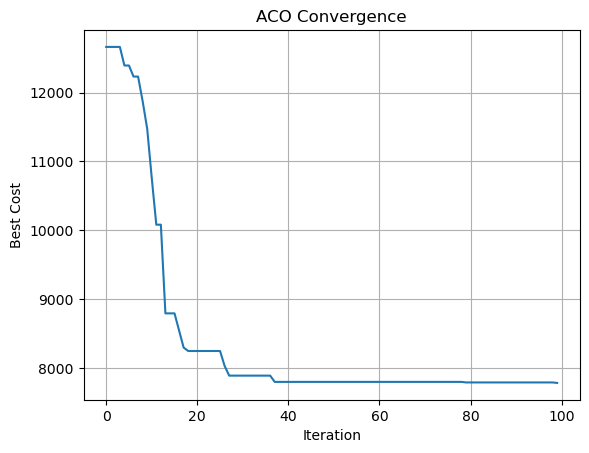

In [9]:
plt.plot(best_costs)
plt.xlabel("Iteration")
plt.ylabel("Best Cost")
plt.title("ACO Convergence")
plt.grid(True)
plt.show()